[[Model]]
    Model(lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 9
    # variables        = 1
    chi-square         = 137.084438
    reduced chi-square = 17.1355548
    Akaike info crit   = 26.5103525
    Bayesian info crit = 26.7075770
    R-squared          = 0.98947615
[[Variables]]
    a: -993.987682 +/- 9.40834938 (0.95%) (init = 0.002)


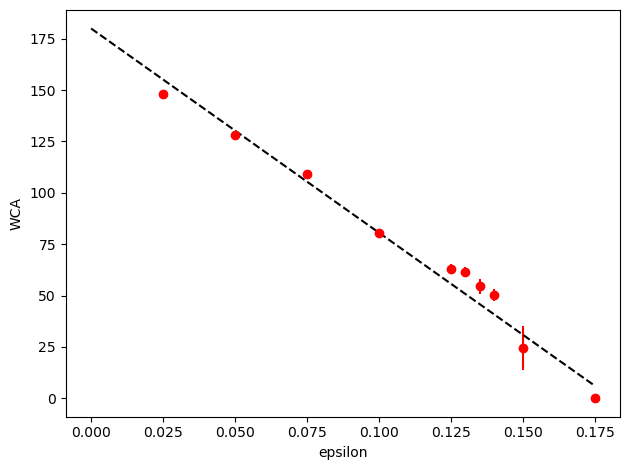

In [39]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from sympy import symbols, solve
import openpyxl 

c = 0
titles, epsilon, wca,er_wca,cos,er_cos = [], [],[], [], [], []
with open('collected data') as f:
    for line in f:
        p = line.split()
        c += 1
        if c == 1:
            titles.append(p)
        else:
            epsilon.append(float(p[0]))
            wca.append(float(p[1]))
            er_wca.append(float(p[2]))
            cos.append(float(p[3]))
            er_cos.append(float(p[4]))



plt.errorbar(epsilon, wca, yerr = er_wca, fmt ='ro')

## removing zero

wca = wca[:9]
er_wca = er_wca[:9]
cos = cos[:9]
er_cos = er_cos[:9]
weights_wca, weights_cos = [], []
for i in range(len(er_wca)):
    weights_wca.append(1/er_wca[i])
    weights_cos.append(1/er_cos[i])

def lin(x, a):
    return 180 + a * x



model = Model(lin)
params1 = model.make_params(a=0.002)


result1 = model.fit(wca, params1, x=epsilon[:9], weights=weights_wca)


print(result1.fit_report())


xx = np.linspace(0, np.max(epsilon), 100)
fitting_wca = lin(xx, result1.params['a'].value)
plt.plot(xx, fitting_wca, '--k')
plt.xlabel('epsilon')
plt.ylabel('WCA')
# plt.legend()
plt.tight_layout()
plt.show()



[[Model]]
    Model(lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 9
    # variables        = 1
    chi-square         = 195.196715
    reduced chi-square = 24.3995894
    Akaike info crit   = 29.6910494
    Bayesian info crit = 29.8882740
    R-squared          = -63.7989102
[[Variables]]
    a:  17.3794828 +/- 0.03443015 (0.20%) (init = 0.002)


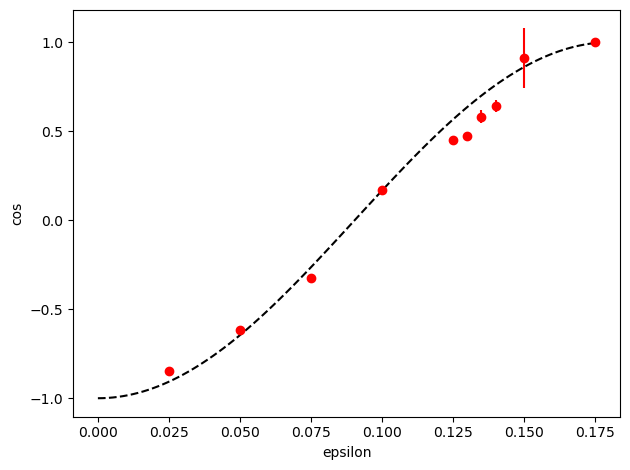

In [40]:
c = 0
titles, epsilon, wca,er_wca,cos,er_cos = [], [],[], [], [], []
with open('collected data') as f:
    for line in f:
        p = line.split()
        c += 1
        if c == 1:
            titles.append(p)
        else:
            epsilon.append(float(p[0]))
            wca.append(float(p[1]))
            er_wca.append(float(p[2]))
            cos.append(float(p[3]))
            er_cos.append(float(p[4]))



plt.errorbar(epsilon, cos, yerr = er_cos, fmt ='ro')
## removing zero

wca = wca[:9]
er_wca = er_wca[:9]
cos = cos[:9]
er_cos = er_cos[:9]
weights_wca, weights_cos = [], []
for i in range(len(er_wca)):
    weights_wca.append(1/er_wca[i])
    weights_cos.append(1/er_cos[i])

def lin(x, a):
    return  -np.cos(a*x)



model = Model(lin)
params1 = model.make_params(a=0.002)


result1 = model.fit(cos, params1, x=epsilon[:9], weights=weights_cos)


print(result1.fit_report())


xx = np.linspace(0, np.max(epsilon), 100)
fitting_cos = lin(xx, result1.params['a'].value)
plt.plot(xx, fitting_cos, '--k')
plt.xlabel('epsilon')
plt.ylabel('cos')
# plt.legend()
plt.tight_layout()
plt.show()

